##Bike Demand Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

# Load the dataset
df_hr = pd.read_csv('CBS_Hourly.csv',low_memory=False)
df_day = pd.read_csv('CBS_Daily.csv',low_memory=False)
# df_full = pd.read_csv('CBS_Full.csv',low_memory=False)



<!-- Data Cleanining and preprocessing  --> 

In [2]:
#Rename the columns for better readability
df_hr_n = df_hr.rename(columns={'relativehumidity_2m (%)': 're_humidity', 'temperature_2m (°C)':'tempt_2m','weathercode (wmo code)':'wmo_code','windspeed_10m (km/h)':'wind_speed'})
df_hr_n 
#data cleaning for df_hr
df_hr_n.isnull().sum() 
df_hr_n = df_hr_n.dropna(subset=['Casual', 'Member', 'Total_rides'])
df_hr_n.isnull().sum() 
df_hr_n.describe() 
df_hr_n.duplicated().sum() 



0

In [3]:

df_hr_n.isnull().sum()  
df_hr_n.duplicated().sum()
df_hr_clean = df_hr_n.copy()
df_hr_clean = df_hr_n.drop_duplicates()  # If you want to remove duplicates, uncomment this line
df_hr_clean.isnull().sum()  # Check for any remaining null values 

# Convert 'Date' column to datetime format
df_hr_n.loc[:, 'Date'] = pd.to_datetime(df_hr_n['Date'], errors='coerce')
# Extract time from data  
df_hr_clean['Date'] = pd.to_datetime(df_hr_clean['Date'], errors='coerce', dayfirst=True)
df_hr_clean['Date'] = df_hr_clean['Date'].dt.date
df_hr_clean 




,Casual,Date,Hour,Member,Total_rides,re_humidity,tempt_2m,wmo_code,wind_speed
0,20.0,2021-01-01,0,26.0,46.0,90,2.4,1,10.2
1,23.0,2021-01-01,1,23.0,46.0,88,1.8,1,10.0
2,20.0,2021-01-01,2,28.0,48.0,87,1.1,2,10.1
3,9.0,2021-01-01,3,7.0,16.0,81,1.6,2,10.6
4,7.0,2021-01-01,4,5.0,12.0,77,1.6,2,9.9
...,...,...,...,...,...,...,...,...,...
26275,132.0,NaT,19,190.0,322.0,71,-7.7,0,3.3
26276,125.0,NaT,20,194.0,319.0,79,-10.2,0,6.7
26277,84.0,NaT,21,137.0,221.0,80,-11.0,0,10.0
26278,83.0,NaT,22,142.0,225.0,80,-10.4,0,8.7


C:\Users\skyli\AppData\Local\Temp\ipykernel_19964\2561651818.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_hr_clean, x='wmo_code', y='Total_rides', ci=None)


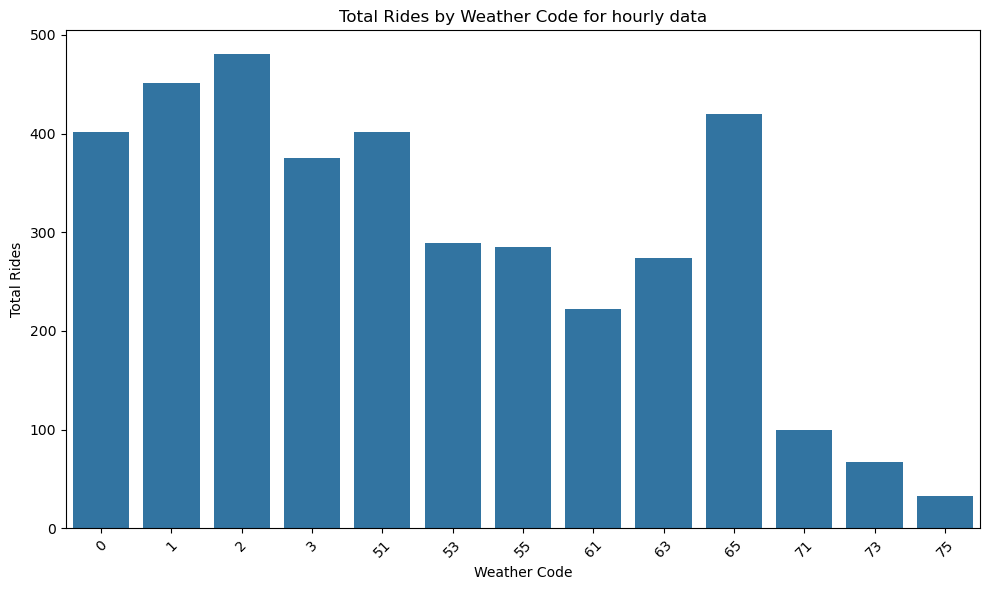

In [4]:
#visualization of relationship between 'Total_rides' and 'wmo_code' using bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=df_hr_clean, x='wmo_code', y='Total_rides', ci=None)   
plt.title('Total Rides by Weather Code for hourly data')
plt.xlabel('Weather Code')
plt.ylabel('Total Rides')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [5]:
df_hr_clean 

,Casual,Date,Hour,Member,Total_rides,re_humidity,tempt_2m,wmo_code,wind_speed
0,20.0,2021-01-01,0,26.0,46.0,90,2.4,1,10.2
1,23.0,2021-01-01,1,23.0,46.0,88,1.8,1,10.0
2,20.0,2021-01-01,2,28.0,48.0,87,1.1,2,10.1
3,9.0,2021-01-01,3,7.0,16.0,81,1.6,2,10.6
4,7.0,2021-01-01,4,5.0,12.0,77,1.6,2,9.9
...,...,...,...,...,...,...,...,...,...
26275,132.0,NaT,19,190.0,322.0,71,-7.7,0,3.3
26276,125.0,NaT,20,194.0,319.0,79,-10.2,0,6.7
26277,84.0,NaT,21,137.0,221.0,80,-11.0,0,10.0
26278,83.0,NaT,22,142.0,225.0,80,-10.4,0,8.7


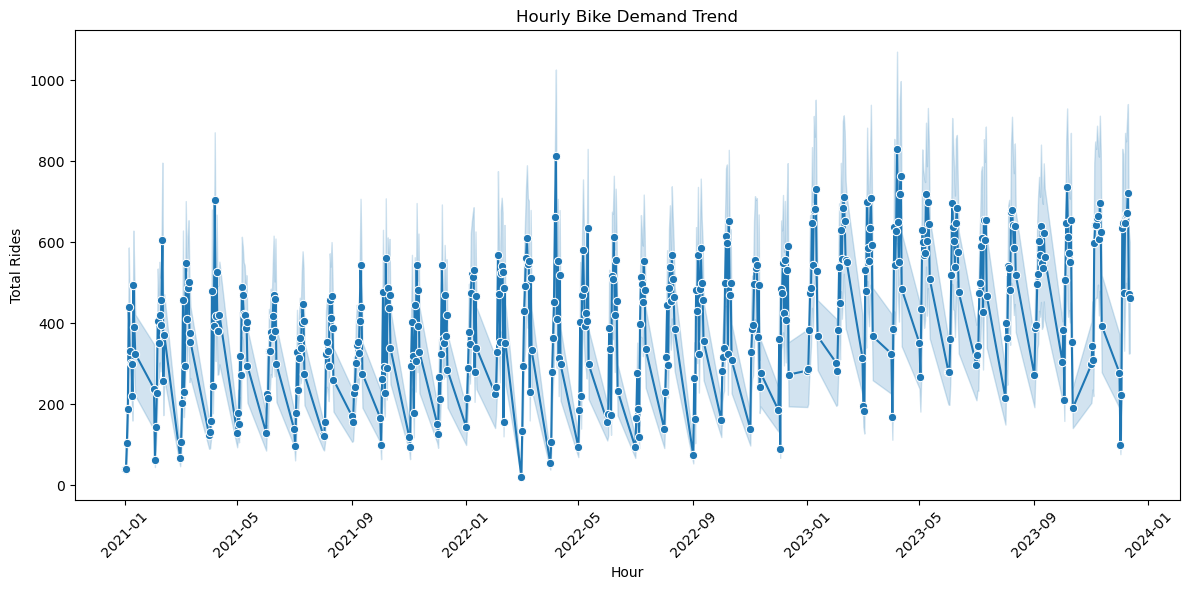

In [6]:
# data visualization hourly pattern of bike demand 
#line plot for hour vs total rides
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_hr_clean, x='Date', y='Total_rides', marker='o')     
plt.title('Hourly Bike Demand Trend')
plt.xlabel('Hour')
plt.ylabel('Total Rides')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()  





In [7]:
#seassion wise hourly distribution of bike rentals  
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 1. Make sure Hour is numeric
df_hr_clean['Hour'] = pd.to_numeric(df_hr_clean['Hour'], errors='coerce')

# 2. Create Season column from Month
df_hr_clean['Season'] = np.where(df_hr_clean['Month'].isin([12, 1, 2]), 'Winter',np.where(df_hr_clean['Month'].isin([3, 4, 5]), 'Spring', np.where(df_hr_clean['Month'].isin([6, 7, 8]), 'Summer', 'Fall')))

# 3. Group by Season and Hour
df_season_hourly = df_hr_clean.groupby(['Season', 'Hour'], as_index=False)['Total_rides'].sum()

# 4. Plot as barplot
plt.figure(figsize=(12, 6))
sns.barplot(data=df_season_hourly, x='Hour', y='Total_rides', hue='Season', palette='viridis')
plt.title('Seasonal Hourly Bike Demand Distribution')   
plt.xlabel('Hour of the Day')
plt.ylabel('Total Rides')
plt.xticks(range(0, 24))  # Show 0–23
plt.legend(title='Season')
plt.tight_layout()
plt.show()


KeyError: 'Month'

C:\Users\skyli\AppData\Local\Temp\ipykernel_3912\3531939296.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_hr_clean, x='wmo_code', y='Member', ci=None, color='blue', label='Member')
C:\Users\skyli\AppData\Local\Temp\ipykernel_3912\3531939296.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_hr_clean, x='wmo_code', y='Casual', ci=None, color='orange', label='Casual')


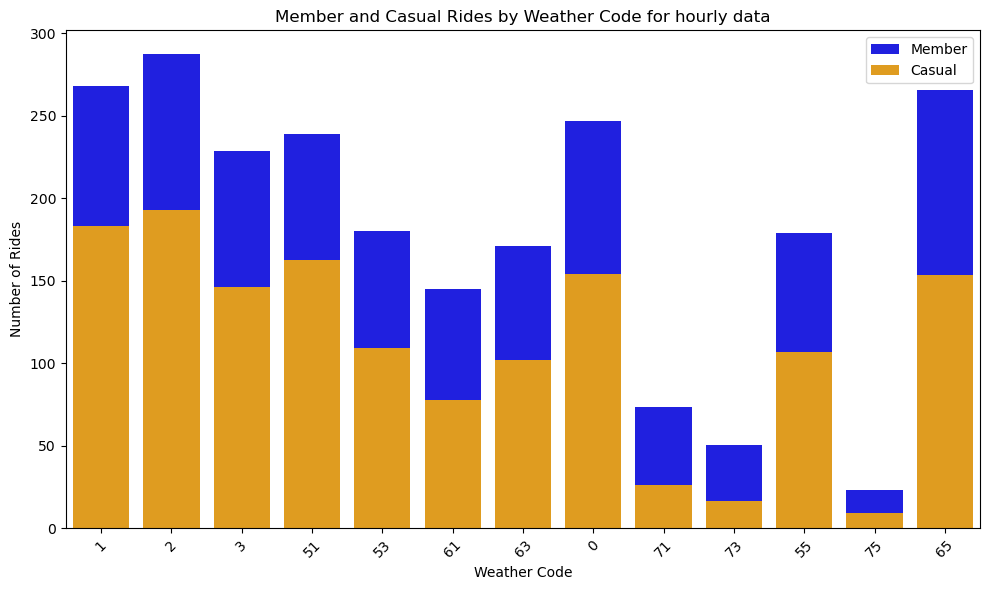

In [ ]:
#visualization of relationship between 'wmo_code'and member and casual riders
plt.figure(figsize=(10, 6))
sns.barplot(data=df_hr_clean, x='wmo_code', y='Member', ci=None, color='blue', label='Member')  
sns.barplot(data=df_hr_clean, x='wmo_code', y='Casual', ci=None, color='orange', label='Casual')
plt.title('Member and Casual Rides by Weather Code for hourly data')
plt.xlabel('Weather Code')  
plt.ylabel('Number of Rides')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()  

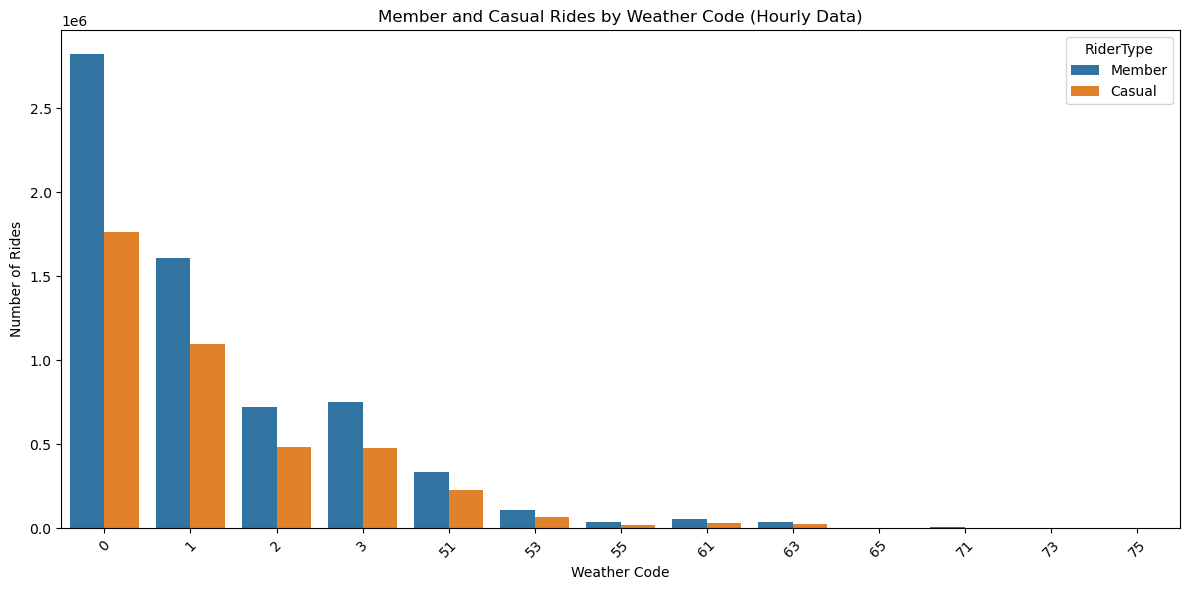

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Aggregate data
df_wmo = df_hr_clean.groupby('wmo_code', as_index=False)[['Member', 'Casual']].sum()

# 2. Melt to long format for seaborn
df_melt = df_wmo.melt(id_vars='wmo_code', value_vars=['Member', 'Casual'], var_name='RiderType', value_name='Rides')

# 3. Barplot with hue
plt.figure(figsize=(12, 6))
sns.barplot(data=df_melt, x='wmo_code', y='Rides', hue='RiderType')
plt.title('Member and Casual Rides by Weather Code (Hourly Data)')
plt.xlabel('Weather Code')  
plt.ylabel('Number of Rides')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
#data visulaization hourly trend of bike demand 


